In [1]:
import pandas as pd
from keras.layers import Dense,LSTM,Flatten, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
df=pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

TravelDate  Passengers
0   1/1/1949         112
1   2/1/1949         118
2   3/1/1949         132
3   4/1/1949         129
4   5/1/1949         121

In [4]:
df.TravelDate=pd.to_datetime(df.TravelDate)

In [5]:
df=df.set_index('TravelDate')

In [6]:
df.head()

Passengers
TravelDate            
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

In [7]:
train,test=df[:-12],df[12:]

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler=MinMaxScaler()

In [10]:
train=scaler.fit_transform(train)
test=scaler.transform(test)

C:\Users\user\anaconda3\envs\nlp_course\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
n_input=12
n_features=1
generator=TimeseriesGenerator(train,train,length=n_input,batch_size=6)
model=Sequential()
model.add(LSTM(180,activation='relu',input_shape=(n_input,n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit_generator(generator,epochs=200)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
20/20 [==============================] - 2s 86ms/step - loss: 0.0957
Epoch 2/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0155
Epoch 3/200
20/20 [==============================] - 0s 20ms/step - loss: 0.0144
Epoch 4/200
20/20 [==============================] - 0s 20ms/step - loss: 0.0118
Epoch 5/200
20/20 [==============================] - 0s 19ms/step - loss: 0.0103
Epoch 6/200
20/20 [==============================] - 0s 19ms/step - loss: 0.0100
Epoch 7/200
20/20 [==============================] - 0s 20ms/step - loss: 0.0129
Epoch 8/200
20/20 [==============================] - 0s 20ms/step - loss: 0.0089
Epoch 9/200
20/20 [==============================] - 0s 19ms/step - loss: 0.0086
Epoch 10/200
20/20 [==============================] - 0s 19ms/step - loss: 0.0086
Epoch 11/200
20/20 [==============================] - 0s 20ms/step - 

20/20 [==============================] - 0s 22ms/step - loss: 0.0020
Epoch 94/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0025
Epoch 95/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0023
Epoch 96/200
20/20 [==============================] - 0s 22ms/step - loss: 0.0027
Epoch 97/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0018
Epoch 98/200
20/20 [==============================] - 0s 22ms/step - loss: 0.0024
Epoch 99/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0031
Epoch 100/200
20/20 [==============================] - 0s 22ms/step - loss: 0.0033
Epoch 101/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0028
Epoch 102/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0022A: 0s - loss: 0.00
Epoch 103/200
20/20 [==============================] - 0s 24ms/step - loss: 0.0029
Epoch 104/200
20/20 [==============================] - 1s 30ms/step - loss: 0.0022
Epoch 

20/20 [==============================] - 0s 23ms/step - loss: 0.0027
Epoch 191/200
20/20 [==============================] - 0s 25ms/step - loss: 0.0020
Epoch 192/200
20/20 [==============================] - 0s 23ms/step - loss: 0.0019
Epoch 193/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0019
Epoch 194/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0015
Epoch 195/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0015
Epoch 196/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0014
Epoch 197/200
20/20 [==============================] - 0s 22ms/step - loss: 0.0018
Epoch 198/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0020
Epoch 199/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0015
Epoch 200/200
20/20 [==============================] - 0s 21ms/step - loss: 0.0018


In [12]:
pred_list=[]
batch=train[-n_input:].reshape((1,n_input,n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [13]:
df_predict=pd.DataFrame(scaler.inverse_transform(pred_list),index=df[-n_input:].index,columns=['Predictions'])
df_test=pd.concat([df,df_predict],axis=1)

In [14]:
df_test.head()

Passengers  Predictions
TravelDate                         
1949-01-01         112          NaN
1949-02-01         118          NaN
1949-03-01         132          NaN
1949-04-01         129          NaN
1949-05-01         121          NaN

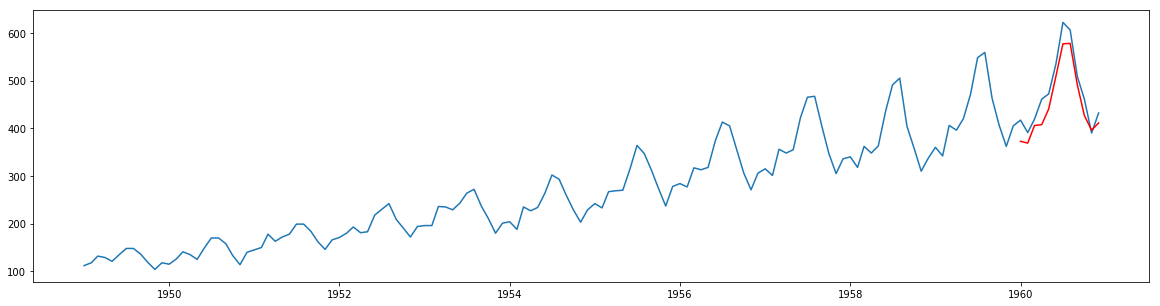

In [15]:
plt.figure(figsize=(20,5))
plt.plot(df)
plt.plot(df_test['Predictions'],c='r')

In [16]:
train=df
scaler.fit(train)
train=scaler.transform(train)
n_input=12
n_features=1
generator=TimeseriesGenerator(train,train,length=n_input,batch_size=6)
model.fit_generator(generator,epochs=200)
pred_list=[]
batch=train[-n_input::].reshape((1,n_input,n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch=np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

Epoch 1/200
 6/22 [=======>......................] - ETA: 0s - loss: 9.9049e-04

C:\Users\user\anaconda3\envs\nlp_course\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


22/22 [==============================] - 1s 23ms/step - loss: 0.0013
Epoch 2/200
22/22 [==============================] - 0s 22ms/step - loss: 0.0018
Epoch 3/200
22/22 [==============================] - 0s 22ms/step - loss: 0.0029
Epoch 4/200
22/22 [==============================] - 1s 26ms/step - loss: 0.0016
Epoch 5/200
22/22 [==============================] - 0s 21ms/step - loss: 0.0014
Epoch 6/200
22/22 [==============================] - 1s 33ms/step - loss: 0.0015
Epoch 7/200
22/22 [==============================] - 1s 50ms/step - loss: 0.0011
Epoch 8/200
22/22 [==============================] - 1s 43ms/step - loss: 0.0015
Epoch 9/200
22/22 [==============================] - 1s 46ms/step - loss: 0.0018
Epoch 10/200
22/22 [==============================] - 1s 45ms/step - loss: 0.0019
Epoch 11/200
22/22 [==============================] - 0s 22ms/step - loss: 0.0021
Epoch 12/200
22/22 [==============================] - 0s 22ms/step - loss: 0.0017
Epoch 13/200
22/22 [=================

Epoch 100/200
22/22 [==============================] - 1s 31ms/step - loss: 0.0012A: 0s - loss: 
Epoch 101/200
22/22 [==============================] - 1s 27ms/step - loss: 8.4138e-04
Epoch 102/200
22/22 [==============================] - 1s 27ms/step - loss: 0.0014: 0s - loss: 0.0
Epoch 103/200
22/22 [==============================] - 1s 23ms/step - loss: 0.0016
Epoch 104/200
22/22 [==============================] - 1s 24ms/step - loss: 9.6596e-04
Epoch 105/200
22/22 [==============================] - 1s 26ms/step - loss: 0.0011
Epoch 106/200
22/22 [==============================] - 1s 26ms/step - loss: 0.0014
Epoch 107/200
22/22 [==============================] - 1s 23ms/step - loss: 0.0014
Epoch 108/200
22/22 [==============================] - 1s 26ms/step - loss: 9.1354e-04
Epoch 109/200
22/22 [==============================] - 1s 29ms/step - loss: 0.0014
Epoch 110/200
22/22 [==============================] - 1s 33ms/step - loss: 0.0011
Epoch 111/200
22/22 [========================

22/22 [==============================] - 1s 41ms/step - loss: 0.0012
Epoch 197/200
22/22 [==============================] - 1s 25ms/step - loss: 0.0011
Epoch 198/200
22/22 [==============================] - 0s 21ms/step - loss: 0.0010
Epoch 199/200
22/22 [==============================] - 0s 22ms/step - loss: 0.0011
Epoch 200/200
22/22 [==============================] - 0s 21ms/step - loss: 0.0012


In [17]:
from pandas.tseries.offsets import DateOffset

In [18]:
add_dates=[df.index[-1]+DateOffset(months=x)for x in range(0,13)]
future_dates=pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [19]:
future_dates.tail(12)

Passengers
1961-01-01        NaN
1961-02-01        NaN
1961-03-01        NaN
1961-04-01        NaN
1961-05-01        NaN
1961-06-01        NaN
1961-07-01        NaN
1961-08-01        NaN
1961-09-01        NaN
1961-10-01        NaN
1961-11-01        NaN
1961-12-01        NaN

In [20]:
df_predict=pd.DataFrame(scaler.inverse_transform(pred_list),
                       index=future_dates[-n_input:].index,columns=['Prediction'])
df_proj=pd.concat([df,df_predict],axis=1)

In [21]:
df_proj.tail()

Passengers  Prediction
1961-08-01         NaN  652.262333
1961-09-01         NaN  554.712923
1961-10-01         NaN  488.637110
1961-11-01         NaN  431.989104
1961-12-01         NaN  451.375244

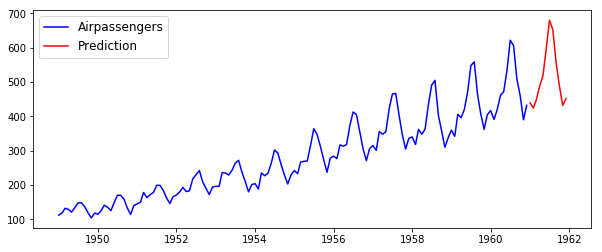

In [22]:
plt.figure(figsize=(10,4))
plt.plot(df,c='b',label='Airpassengers')
plt.plot(df_proj['Prediction'],c='r',label='Prediction')
plt.legend(loc='best',fontsize='large')